# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
# Check for NaN samples
print(f"There are {df.isna().sum().sum()} null samples.")
df = df.dropna()

There are 0 null samples.


## Exploratory data analysis

### Visualising and clarifying the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We see that the dataset has a huge number (284807) of datapoints. This can reduce the accessibility of models with are not memory efficient, e.g., KNN.

In [5]:
df["Label"] = df.Class.map({1: "Fraud", 0: "Not fraud"})

We replace the ambiguous `Class` column with a new `Label` column for clearer labeling of fraud.

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Not fraud
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Not fraud
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Not fraud
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Not fraud
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Not fraud


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Balance in the dataset

In [8]:
num_fraud = df[df.Label == "Fraud"].shape[0]
num_total = df.shape[0]

print(f"Total number of entries = {num_total}")
print(f"Total number of frauds = {num_fraud}")
print(f"Percentage of frauds = {num_fraud / num_total * 100:.5f}%")

Total number of entries = 284807
Total number of frauds = 492
Percentage of frauds = 0.17275%


This shows that the dataset is highly imbalanced, with only 0.17% of the transactions being fraudulent.

### Analysing the transaction times

Text(0.5, 1.0, 'Distribution of transaction times')

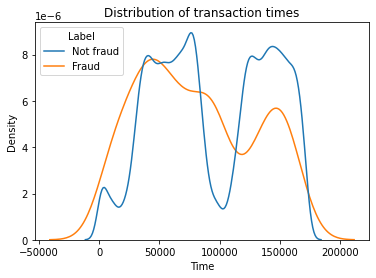

In [9]:
sns.kdeplot(data=df, x="Time", hue="Label", common_norm=False)
plt.title("Distribution of transaction times")

The `Time` column does not have any apparent pattern that we can work with, and can thus be safely dropped.

In [10]:
df = df.drop(["Time"], axis=1)

### Analysing the transaction amounts

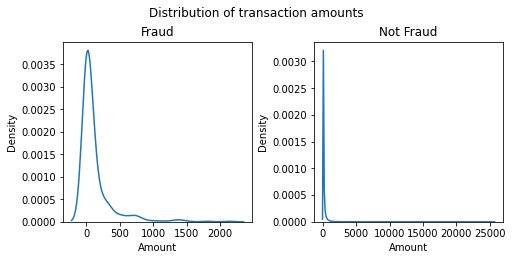

Max transaction amount = 25691.16
Max fraudulent amount = 2125.87


In [11]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), constrained_layout=True)

sns.kdeplot(data=df[df.Label == "Fraud"], x="Amount", ax=axs[0])
axs[0].set_title("Fraud")

sns.kdeplot(data=df[df.Label != "Fraud"], x="Amount", ax=axs[1])
axs[1].set_title("Not Fraud")

fig.suptitle("Distribution of transaction amounts")
plt.show()

max_amount = df.Amount.max()
max_fraud = df[df.Label == "Fraud"].Amount.max()
print(f"Max transaction amount = {max_amount}")
print(f"Max fraudulent amount = {max_fraud}")

This shows that the transaction amounts are highly skewed towards the left, with most of them lying close to zero.

Further, the maximum amount among the fraudulent transactions is much less than the other transactions, with the former being around one-tenth of the latter.

### Analysing the (principal) components

Finally, we compare the distributions of fraud and non-fraud transactions for each (PCA) component, as provided in the dataset. This replaces the usual pair plot, as
1. It is time-consuming and computationally intensive to plot a $28\times28$ pair plot, and
2. Since they are specified to be the principal components, we know they are uncorrelated with each other.

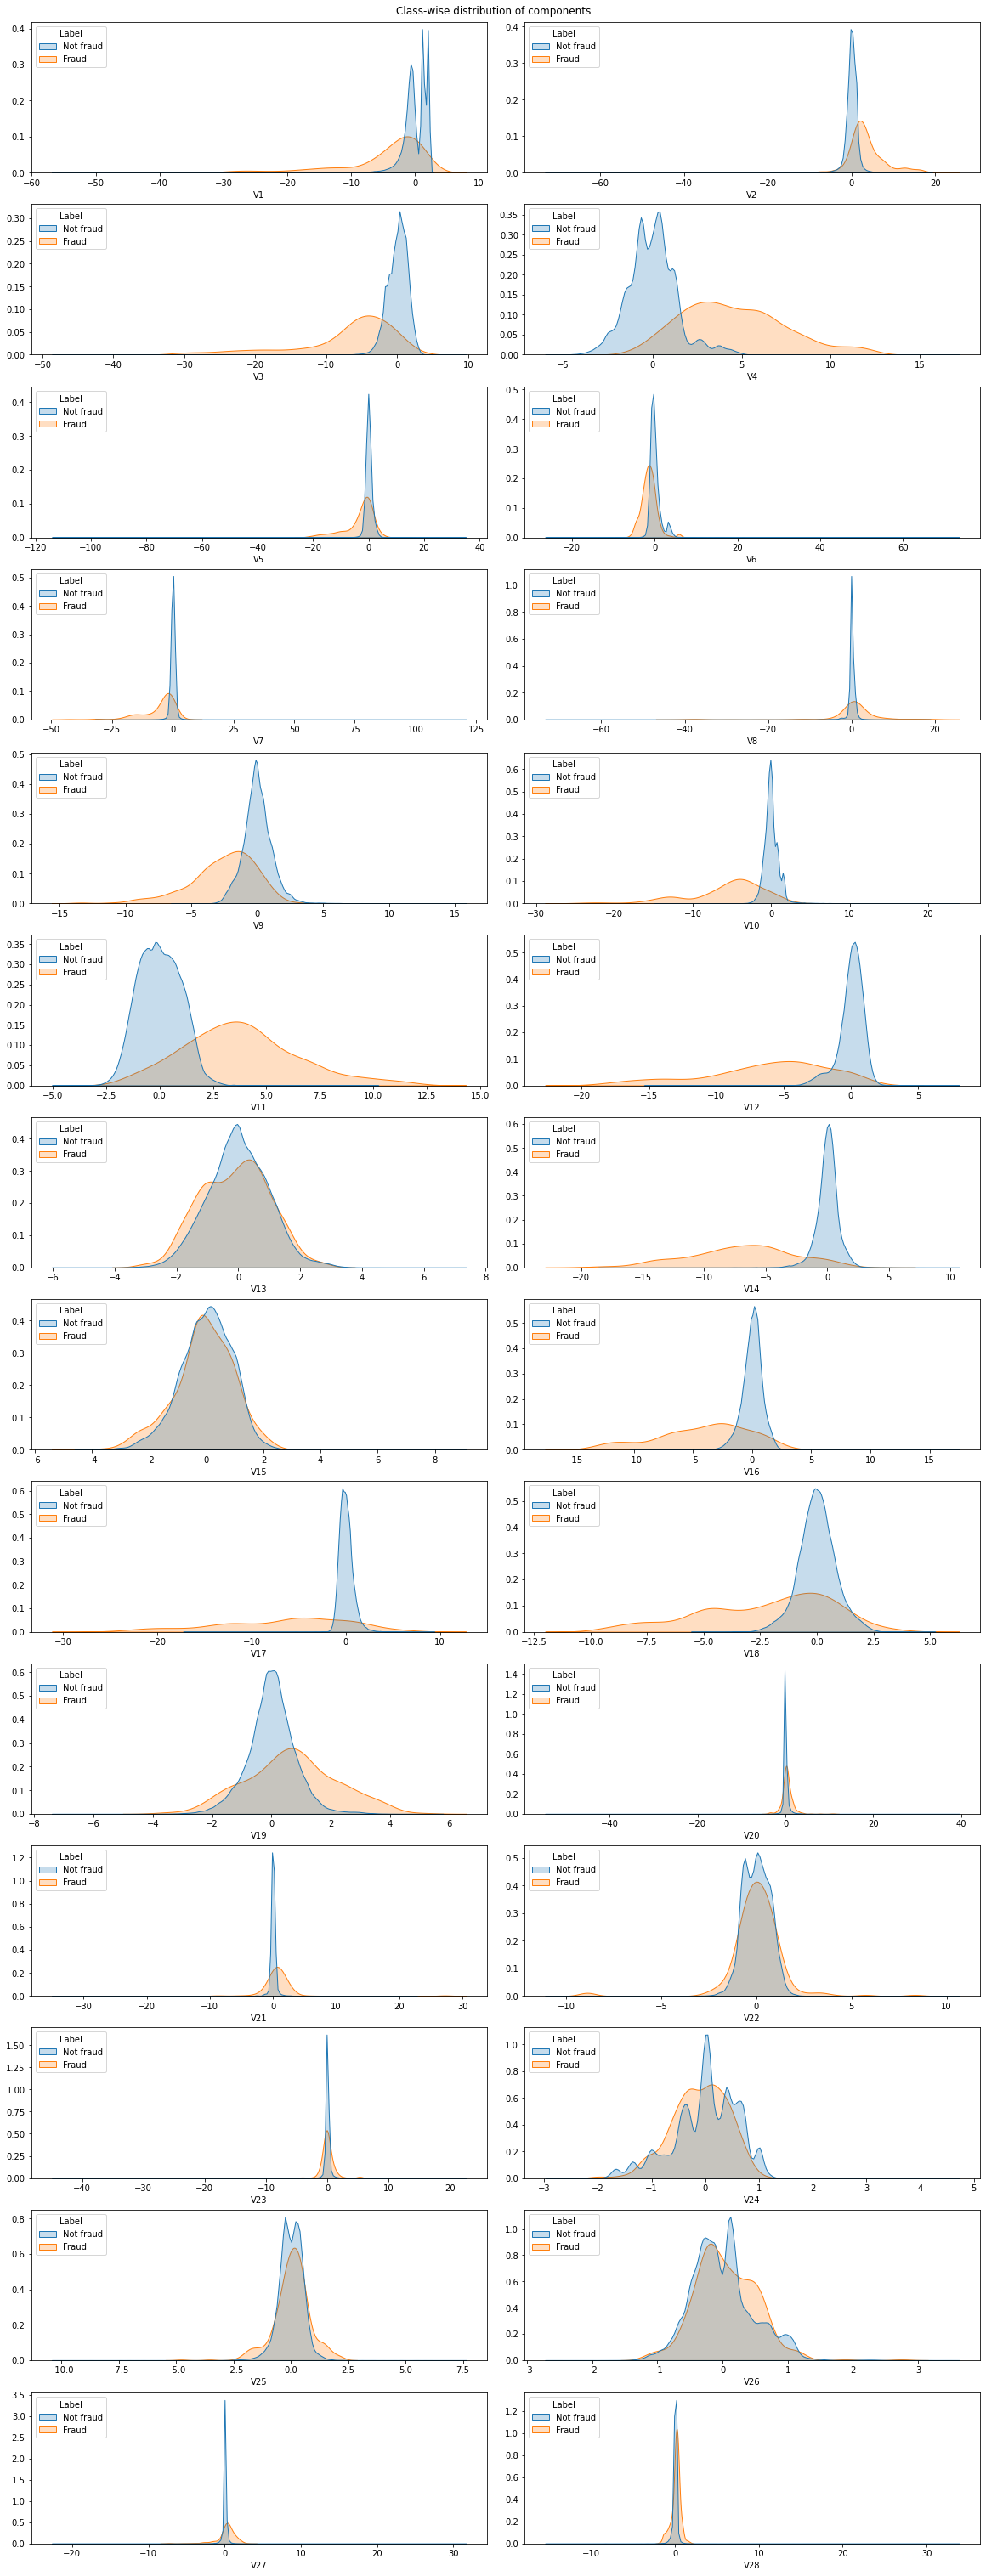

In [12]:
N = 28 # number of components V1...V28
fig, axs = plt.subplots(int(N/2), 2, figsize=(8*2, 3*N/2), constrained_layout=True)

for n in range(N):
    sns.kdeplot(data=df, x=f"V{n+1}", hue="Label",  fill=True, common_norm=False, ax=axs[int(n/2)][n%2])
    axs[int(n/2)][n%2].set_xlabel(f'V{n+1}')
    axs[int(n/2)][n%2].set_ylabel('')
    sns.move_legend(axs[int(n/2)][n%2], "upper left")

fig.suptitle("Class-wise distribution of components")
plt.show()

## Data preprocessing

### Train-test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(['Label', 'Class'], axis=1)
y = df.Class

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We need to scale the columns to prevent unncessary bias in the model. Since PCA components are already scaled, we scale only the `Amount` column.

In [17]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

### Handling skewness

Many ML models work better with normally distributed features, as skewness in data can give biased results. We use `PowerTransformer` to reduce skewness.

In [18]:
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

In [19]:
X_cols = X_train.columns

X_train[X_cols] = PT.fit_transform(X_train)
X_test[X_cols] = PT.transform(X_test)

## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# cross-validation
from sklearn.model_selection import KFold, GridSearchCV

### Hyperparameter tuning

In [21]:
kf = KFold(n_splits=5, shuffle=False)
# the KFold object above mimics the default behaviour of the GridSearchCV object; explicit declaration allows us to control shuffle and random_state, which we do not perform here.
C_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

lr_cv = GridSearchCV(estimator=LR, param_grid=C_grid, scoring='roc_auc', cv=kf, verbose=3, return_train_score=True)
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......C=0.001;, score=(train=0.981, test=0.980) total time=   0.3s
[CV 2/5] END .......C=0.001;, score=(train=0.986, test=0.967) total time=   0.3s
[CV 3/5] END .......C=0.001;, score=(train=0.983, test=0.975) total time=   0.3s
[CV 4/5] END .......C=0.001;, score=(train=0.981, test=0.986) total time=   0.2s
[CV 5/5] END .......C=0.001;, score=(train=0.981, test=0.988) total time=   0.3s
[CV 1/5] END ........C=0.01;, score=(train=0.986, test=0.980) total time=   0.4s
[CV 2/5] END ........C=0.01;, score=(train=0.992, test=0.965) total time=   0.3s
[CV 3/5] END ........C=0.01;, score=(train=0.986, test=0.983) total time=   0.3s
[CV 4/5] END ........C=0.01;, score=(train=0.985, test=0.991) total time=   0.3s
[CV 5/5] END ........C=0.01;, score=(train=0.986, test=0.990) total time=   0.3s
[CV 1/5] END .........C=0.1;, score=(train=0.986, test=0.981) total time=   0.3s
[CV 2/5] END .........C=0.1;, score=(train=0.993,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [22]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.253252,0.026187,0.022358,0.000492,0.001,{'C': 0.001},0.980139,0.966595,0.974593,0.985846,...,0.978964,0.007697,7,0.980965,0.985679,0.982669,0.981067,0.981177,0.982312,0.001795
1,0.287384,0.028655,0.024224,0.002555,0.010,{'C': 0.01},0.980313,0.964839,0.983480,0.991004,...,0.981865,0.009377,1,0.985968,0.992217,0.986212,0.985416,0.985861,0.987135,0.002554
2,0.333198,0.041779,0.030578,0.005819,0.100,{'C': 0.1},0.981063,0.960202,0.985780,0.993072,...,0.980962,0.011088,6,0.986424,0.992568,0.985736,0.985006,0.986066,0.987160,0.002744
3,0.271424,0.022263,0.021646,0.001685,1.000,{'C': 1},0.981162,0.958231,0.986029,0.993264,...,0.981000,0.012020,5,0.986378,0.992356,0.985579,0.984212,0.986130,0.986931,0.002814
4,0.418197,0.207694,0.025468,0.005745,10.000,{'C': 10.0},0.981170,0.958217,0.986046,0.993270,...,0.981072,0.012059,2,0.986370,0.992257,0.985560,0.984116,0.986159,0.986892,0.002796
5,0.368607,0.081823,0.028490,0.006700,100.000,{'C': 100.0},0.981171,0.958181,0.986051,0.993268,...,0.981069,0.012075,3,0.986369,0.992253,0.985558,0.984107,0.986161,0.986890,0.002796
6,0.339103,0.096197,0.025623,0.007838,1000.000,{'C': 1000.0},0.981171,0.958177,0.986051,0.993268,...,0.981069,0.012076,4,0.986369,0.992253,0.985558,0.984106,0.986161,0.986889,0.002796


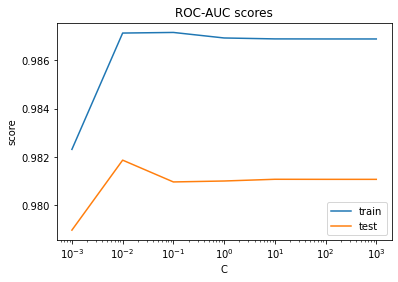

In [23]:
plt.figure()
plt.xscale('log')

sns.lineplot(data=lr_cv_df, x='param_C', y='mean_train_score', label='train')
sns.lineplot(data=lr_cv_df, x='param_C', y='mean_test_score', label='test')

plt.xlabel('C')
plt.ylabel('score')
plt.title('ROC-AUC scores')
plt.legend()
plt.show()

In [24]:
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print(f"The highest test ROC_AUC is {best_score:.8f} at C = {best_C}")

The highest test ROC_AUC is 0.98186520 at C = 0.01


### Optimal logistic regression

In [25]:
best_LR = LogisticRegression(C=best_C)
best_LR.fit(X_train, y_train)

LogisticRegression(C=0.01)

#### Predictions on train data

In [26]:
y_train_pred = best_LR.predict(X_train)

In [27]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9992375754900584
Precision =  0.9067796610169492
Recall = 0.622093023255814
F1-score = 0.7379310344827587


In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.62      0.74       344

    accuracy                           1.00    199364
   macro avg       0.95      0.81      0.87    199364
weighted avg       1.00      1.00      1.00    199364



It is important to note that accuracy is not a very reliable metric of performance due to heavy class imbalance in the data (blindly predicting as "not fraud" would earn an accuracy of over 99%).

#### ROC-AUC on train data

In [29]:
def show_ROC(y, scores):
  fpr, tpr, thresholds = metrics.roc_curve(y, scores)
  auc_score = metrics.roc_auc_score(y, scores)

  plt.figure()
  plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.5f})")
  plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

  return auc_score

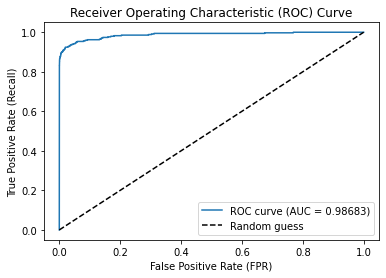

AUC-score on train data =  0.9868277232859617


In [30]:
y_train_pred_proba = best_LR.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

#### Predictions on test data

In [31]:
y_test_pred = best_LR.predict(X_test)

In [32]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9991222218320986
Precision =  0.8613861386138614
Recall = 0.5878378378378378
F1-score = 0.6987951807228916


In [33]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.59      0.70       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

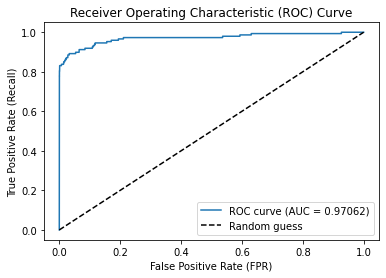

AUC-score on test data =  0.9706236543126161


In [34]:
y_test_pred_proba = best_LR.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

## XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
  max_depth=2, n_estimators=250,
  scale_pos_weight = ((num_total-num_fraud) / num_fraud))
# the last parameter takes care of class imbalance

### Hyperparameter tuning

In [36]:
param_grid = {'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.6, 0.7, 0.8, 0.9]}

xgb_cv = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, return_train_score=True)
xgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.970) total time=   1.5s
[CV 2/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.980) total time=   1.1s
[CV 3/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.981) total time=   1.3s
[CV 1/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.974) total time=   1.5s
[CV 2/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.980) total time=   1.2s
[CV 3/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.981) total time=   1.2s
[CV 1/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.975) total time=   1.1s
[CV 2/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.978) total time=   1.0s
[CV 3/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.978) total time=   1.2s
[CV 1/3] END learning_rate=0.2, subsample=0.9;, 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [37]:
xgb_cv_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_df.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,1.177548,0.093897,0.101046,0.051363,0.2,0.7,"{'learning_rate': 0.2, 'subsample': 0.7}",0.973706,0.979751,0.980694,0.978050,0.003096,5,0.999958,0.999982,0.999973,0.999971,0.000010
17,0.982554,0.138135,0.051185,0.007391,0.6,0.7,"{'learning_rate': 0.6, 'subsample': 0.7}",0.967794,0.985336,0.882965,0.945365,0.044701,19,1.000000,1.000000,0.879286,0.959762,0.056905
0,1.253178,0.166947,0.065363,0.004796,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969712,0.980240,0.981268,0.977073,0.005222,11,0.999953,0.999976,0.999981,0.999970,0.000012
7,1.002734,0.061054,0.055280,0.000752,0.3,0.9,"{'learning_rate': 0.3, 'subsample': 0.9}",0.980668,0.980563,0.978526,0.979919,0.000986,1,0.999987,0.999995,0.999996,0.999993,0.000004
18,1.041975,0.062926,0.060122,0.001370,0.6,0.8,"{'learning_rate': 0.6, 'subsample': 0.8}",0.969369,0.977070,0.966928,0.971122,0.004322,18,1.000000,1.000000,1.000000,1.000000,0.000000


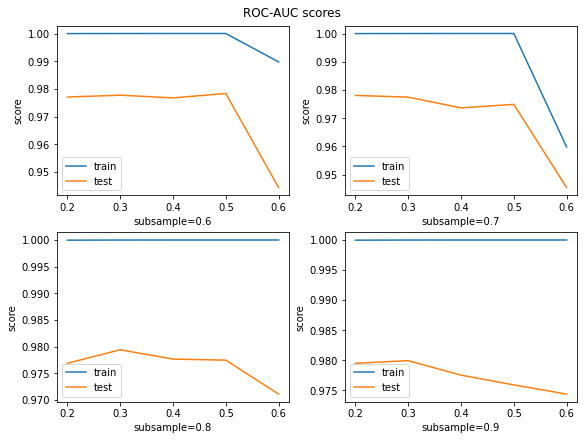

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

for n in range(4):
  subsample = param_grid['subsample'][n]
  temp_df = xgb_cv_df[xgb_cv_df.param_subsample == subsample]
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_train_score', label='train', ax=axs[int(n/2)][n%2])
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_test_score', label='test', ax=axs[int(n/2)][n%2])
  axs[int(n/2)][n%2].set_xlabel("learning rate")
  axs[int(n/2)][n%2].set_ylabel("score")
  axs[int(n/2)][n%2].set_xlabel(f"subsample={subsample}")
  axs[int(n/2)][n%2].legend()

fig.suptitle("ROC-AUC scores")
plt.show()

In [39]:
best_lr, best_ss = xgb_cv.best_params_.values()
best_xgb_score = xgb_cv.best_score_

print(f"The highest test ROC_AUC is {best_xgb_score:.8f} at subsample = {best_ss} and learning rate = {best_lr}")

The highest test ROC_AUC is 0.97991923 at subsample = 0.9 and learning rate = 0.3


### Optimal XGBoost

In [40]:
best_XGB = XGBClassifier(
  max_depth=2, n_estimators=250,
  scale_pos_weight = ((num_total-num_fraud) / num_fraud),
  subsample=best_ss, learning_rate=best_lr,
  objective='binary:logistic')
# binary:logistic: logistic regression for binary classification, output probability
best_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

#### Predictions on train data

In [41]:
y_train_pred = best_XGB.predict(X_train)

In [42]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.9994331975682671
Precision =  0.7527352297592997
Recall = 1.0
F1-score = 0.8589263420724095


In [43]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.75      1.00      0.86       344

    accuracy                           1.00    199364
   macro avg       0.88      1.00      0.93    199364
weighted avg       1.00      1.00      1.00    199364



#### ROC-AUC on train data

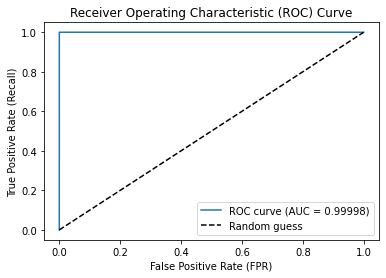

AUC-score on train data =  0.9999759577744904


In [44]:
y_train_pred_proba = best_XGB.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

#### Predictions on test data

In [45]:
y_test_pred = best_XGB.predict(X_test)

In [46]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9988179254005595
Precision =  0.6217616580310881
Recall = 0.8108108108108109
F1-score = 0.7038123167155426


In [47]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.62      0.81      0.70       148

    accuracy                           1.00     85443
   macro avg       0.81      0.90      0.85     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

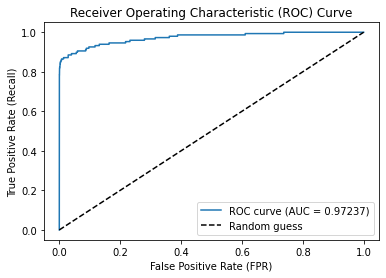

AUC-score on test data =  0.9723657005971327


In [48]:
y_test_pred_proba = best_XGB.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

### Hyperparameter tuning

In [50]:
from time import time
start_time = time()

temp_rf = RandomForestClassifier(n_estimators=100, max_depth=25, min_samples_split=25, min_samples_leaf=25, max_features='sqrt', bootstrap=True, n_jobs=-1, class_weight='balanced')
temp_rf.fit(X_train, y_train)

end_time = time()
print(f"Time taken = {end_time - start_time} seconds.")

Time taken = 23.67140507698059 seconds.


Running one `RandomForest` model with roughly average parameter values takes ~29 seconds. This makes it difficult to perform extensive hyperparameter tuning (with grid search cross-validation) as for earlier models.

We shall use randomised search as an approximate workaround.

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [52]:
param_dist = {
    'n_estimators': randint(100, 250),
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': randint(15, 30),
    'min_samples_leaf': randint(15, 30),
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(bootstrap=True, class_weight='balanced', n_jobs=-1)
rf_cv = RandomizedSearchCV(
  estimator=rf, param_distributions=param_dist, 
  n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, 
  verbose=3, return_train_score=True)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3] END max_depth=50, max_features=log2, min_samples_leaf=18, min_samples_split=17, n_estimators=142;, score=(train=1.000, test=0.978) total time= 2.1min
[CV 1/3] END max_depth=10, max_features=sqrt, min_samples_leaf=28, min_samples_split=18, n_estimators=121;, score=(train=1.000, test=0.981) total time= 2.1min
[CV 2/3] END max_depth=10, max_features=sqrt, min_samples_leaf=28, min_samples_split=18, n_estimators=121;, score=(train=1.000, test=0.983) total time= 2.2min
[CV 1/3] END max_depth=50, max_features=log2, min_samples_leaf=18, min_samples_split=17, n_estimators=142;, score=(train=1.000, test=0.967) total time= 2.2min
[CV 3/3] END max_depth=50, max_features=log2, min_samples_leaf=18, min_samples_split=17, n_estimators=142;, score=(train=1.000, test=0.972) total time= 2.3min
[CV 2/3] END max_depth=30, max_features=log2, min_samples_leaf=18, min_samples_split=23, n_estimators=161;, score=(train=1.000, test=0.983) tota

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31cb90e50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31cb91540>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x31cb91e10>},
                   return_train_score=True, scoring='roc_auc', verbose=3)

In [53]:
best_params = rf_cv.best_params_
best_rf_score = rf_cv.best_score_

print(f"The highest test ROC_AUC is {best_rf_score:.8f} at params being {best_params}")

The highest test ROC_AUC is 0.98101983 at params being {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 27, 'min_samples_split': 15, 'n_estimators': 236}


### Optimal random forest

In [54]:
best_RF = RandomForestClassifier(bootstrap=True, class_weight='balanced', n_jobs=-1, **best_params)
best_RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=27, min_samples_split=15,
                       n_estimators=236, n_jobs=-1)

#### Predictions on train data

In [55]:
y_train_pred = best_RF.predict(X_train)

In [56]:
confusion = confusion_matrix(y_train, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train, y_train_pred))

Accuracy =  0.999533516582733
Precision =  0.7939110070257611
Recall = 0.9854651162790697
F1-score = 0.8793774319066148


In [57]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.79      0.99      0.88       344

    accuracy                           1.00    199364
   macro avg       0.90      0.99      0.94    199364
weighted avg       1.00      1.00      1.00    199364



#### ROC-AUC on train data

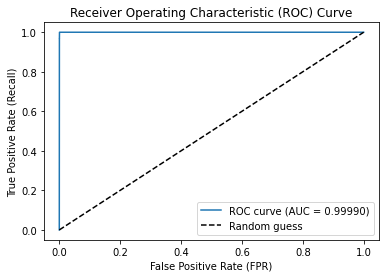

AUC-score on train data =  0.9998964402315532


In [58]:
y_train_pred_proba = best_RF.predict_proba(X_train)[:, 1]
AUC_score = show_ROC(y_train, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

#### Predictions on test data

In [59]:
y_test_pred = best_RF.predict(X_test)

In [60]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9990754069964772
Precision =  0.6994219653179191
Recall = 0.8175675675675675
F1-score = 0.7538940809968847


In [61]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.70      0.82      0.75       148

    accuracy                           1.00     85443
   macro avg       0.85      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



#### ROC-AUC on test data

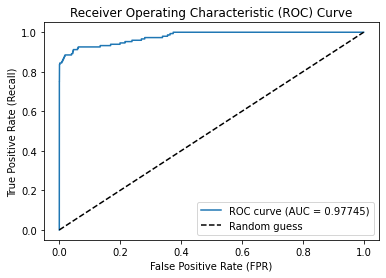

AUC-score on test data =  0.9774456061078959


In [62]:
y_test_pred_proba = best_RF.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

## Best model from preliminary analysis

Thus, we see that XGBoost is the best model (with AUC score of 0.97236) among the three tested above, with the baseline logistic regression model following a close second.

It is important to note that this is somewhat biased and highly subject to hyperparameter tuning and the grid considered for search. This bias is further presented in the Random Forest, where we perform a randomised search over a large grid.

We proceed with XGBoost and logistic regression models for further analysis, as they generally take lesser time and resources than Random Forest, as seen above.

Next, we explore some imbalanced learning techniques.

## Undersampling

In [63]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler()

In [64]:
X_train_US, y_train_US = RUS.fit_resample(X_train, y_train)

In [65]:
X_train_US.shape

(688, 29)

### Logistic regression

In [66]:
C_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

lr_cv = GridSearchCV(estimator=LR, param_grid=C_grid, scoring='roc_auc', cv=5, verbose=3, return_train_score=True)
lr_cv.fit(X_train_US, y_train_US)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......C=0.001;, score=(train=0.980, test=0.985) total time=   0.1s
[CV 2/5] END .......C=0.001;, score=(train=0.991, test=0.953) total time=   0.0s
[CV 3/5] END .......C=0.001;, score=(train=0.982, test=0.979) total time=   0.0s
[CV 4/5] END .......C=0.001;, score=(train=0.983, test=0.983) total time=   0.0s
[CV 5/5] END .......C=0.001;, score=(train=0.982, test=0.984) total time=   0.0s
[CV 1/5] END ........C=0.01;, score=(train=0.986, test=0.985) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=0.994, test=0.956) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=0.986, test=0.987) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=0.987, test=0.987) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=0.987, test=0.986) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.989, test=0.980) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.996,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [67]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018397,0.030443,0.002554,0.000781,0.001,{'C': 0.001},0.984877,0.953371,0.978996,0.983163,...,0.976884,0.011929,3,0.979782,0.990506,0.982096,0.983109,0.982016,0.983502,0.003667
1,0.005620,0.002982,0.002492,0.000810,0.010,{'C': 0.01},0.984877,0.955682,0.986978,0.986786,...,0.980136,0.012250,1,0.986050,0.994274,0.985653,0.987365,0.987128,0.988094,0.003156
2,0.007808,0.003963,0.002155,0.000813,0.100,{'C': 0.1},0.980046,0.956522,0.986347,0.986999,...,0.978488,0.011273,2,0.989448,0.996139,0.987914,0.989513,0.990158,0.990634,0.002849
3,0.006169,0.001699,0.002254,0.000397,1.000,{'C': 1},0.983407,0.952321,0.985507,0.983376,...,0.975978,0.012336,4,0.990532,0.996826,0.989435,0.990909,0.991436,0.991828,0.002584
4,0.039995,0.057117,0.004470,0.001644,10.000,{'C': 10.0},0.984877,0.951481,0.985507,0.983589,...,0.975464,0.012989,7,0.990810,0.997197,0.990532,0.992108,0.992701,0.992670,0.002402
5,0.021300,0.010222,0.003784,0.000720,100.000,{'C': 100.0},0.987818,0.951691,0.985507,0.982523,...,0.975796,0.013297,5,0.990929,0.997263,0.990691,0.992885,0.993663,0.993086,0.002375
6,0.011979,0.003252,0.002798,0.000404,1000.000,{'C': 1000.0},0.987818,0.952531,0.985297,0.981032,...,0.975624,0.012824,6,0.990982,0.997289,0.990664,0.993083,0.993874,0.993178,0.002389


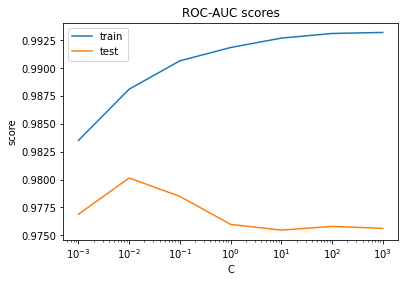

In [68]:
plt.figure()
plt.xscale('log')

sns.lineplot(data=lr_cv_df, x='param_C', y='mean_train_score', label='train')
sns.lineplot(data=lr_cv_df, x='param_C', y='mean_test_score', label='test')

plt.xlabel('C')
plt.ylabel('score')
plt.title('ROC-AUC scores')
plt.legend()
plt.show()

In [69]:
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print(f"The highest test ROC_AUC is {best_score:.8f} at C = {best_C}")

The highest test ROC_AUC is 0.98013640 at C = 0.01


#### Optimal logistic regression

In [70]:
best_LR_US = LogisticRegression(C=best_C)
best_LR_US.fit(X_train_US, y_train_US)

LogisticRegression(C=0.01)

In [71]:
y_train_pred = best_LR_US.predict(X_train_US)

In [72]:
confusion = confusion_matrix(y_train_US, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_US, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_US, y_train_pred))

Accuracy =  0.9476744186046512
Precision =  0.9967741935483871
Recall = 0.8982558139534884
F1-score = 0.944954128440367


In [73]:
print(classification_report(y_train_US, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       344
           1       1.00      0.90      0.94       344

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



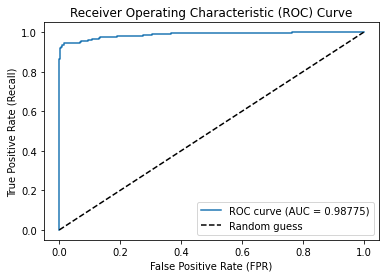

AUC-score on train data =  0.9877467550027041


In [74]:
y_train_pred_proba = best_LR_US.predict_proba(X_train_US)[:, 1]
AUC_score = show_ROC(y_train_US, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [75]:
y_test_pred = best_LR_US.predict(X_test)

In [76]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9891038470091172
Precision =  0.12027158098933075
Recall = 0.8378378378378378
F1-score = 0.21034775233248515


In [77]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.84      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.91      0.60     85443
weighted avg       1.00      0.99      0.99     85443



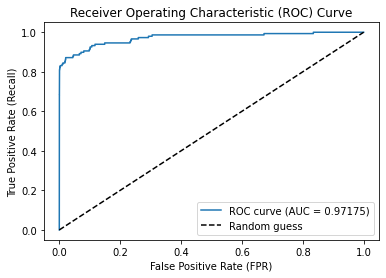

AUC-score on test data =  0.9717530415109406


In [78]:
y_test_pred_proba = best_LR_US.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

### XGBoost

In [79]:
xgb_US = XGBClassifier(max_depth=2, n_estimators=250)

param_grid = {'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.6, 0.7, 0.8, 0.9]}

xgb_cv = GridSearchCV(estimator=xgb_US, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, return_train_score=True)
xgb_cv.fit(X_train_US, y_train_US)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.969) total time=   0.3s
[CV 2/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.980) total time=   0.2s
[CV 3/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.982) total time=   0.2s
[CV 1/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.969) total time=   0.2s
[CV 2/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.976) total time=   0.2s
[CV 3/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.982) total time=   0.2s
[CV 1/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.967) total time=   0.2s
[CV 2/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.976) total time=   0.2s
[CV 3/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.984) total time=   0.2s
[CV 1/3] END learning_rate=0.2, subsample=0.9;, 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [80]:
xgb_cv_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_df.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
3,0.168712,0.001432,0.004342,0.000030,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.967561,0.978719,0.984134,0.976805,0.006900,4,1.0,1.0,1.0,1.0,0.0
12,0.137204,0.003244,0.004245,0.000014,0.5,0.6,"{'learning_rate': 0.5, 'subsample': 0.6}",0.968544,0.974828,0.978490,0.973954,0.004107,16,1.0,1.0,1.0,1.0,0.0
10,0.151337,0.004788,0.004252,0.000036,0.4,0.8,"{'learning_rate': 0.4, 'subsample': 0.8}",0.969679,0.972693,0.978032,0.973468,0.003454,17,1.0,1.0,1.0,1.0,0.0
7,0.161245,0.002923,0.004258,0.000029,0.3,0.9,"{'learning_rate': 0.3, 'subsample': 0.9}",0.966730,0.978947,0.982609,0.976095,0.006789,6,1.0,1.0,1.0,1.0,0.0
4,0.153843,0.005598,0.004264,0.000011,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",0.970359,0.975896,0.983753,0.976669,0.005495,5,1.0,1.0,1.0,1.0,0.0


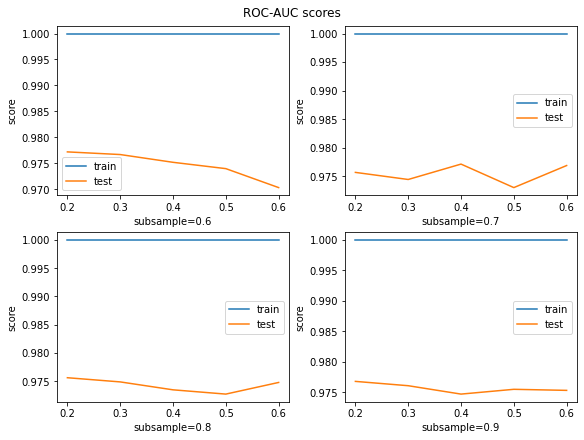

In [81]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

for n in range(4):
  subsample = param_grid['subsample'][n]
  temp_df = xgb_cv_df[xgb_cv_df.param_subsample == subsample]
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_train_score', label='train', ax=axs[int(n/2)][n%2])
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_test_score', label='test', ax=axs[int(n/2)][n%2])
  axs[int(n/2)][n%2].set_xlabel("learning rate")
  axs[int(n/2)][n%2].set_ylabel("score")
  axs[int(n/2)][n%2].set_xlabel(f"subsample={subsample}")
  axs[int(n/2)][n%2].legend()

fig.suptitle("ROC-AUC scores")
plt.show()

In [82]:
best_lr, best_ss = xgb_cv.best_params_.values()
best_xgb_score = xgb_cv.best_score_

print(f"The highest test ROC_AUC is {best_xgb_score:.8f} at subsample = {best_ss} and learning rate = {best_lr}")

The highest test ROC_AUC is 0.97718082 at subsample = 0.6 and learning rate = 0.2


#### Optimal XGBoost

In [83]:
best_XGB_US = XGBClassifier(
  max_depth=2, n_estimators=250,
  subsample=best_ss, learning_rate=best_lr,
  objective='binary:logistic')
best_XGB_US.fit(X_train_US, y_train_US)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [84]:
y_train_pred = best_XGB_US.predict(X_train_US)

In [85]:
confusion = confusion_matrix(y_train_US, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_US, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_US, y_train_pred))

Accuracy =  1.0
Precision =  1.0
Recall = 1.0
F1-score = 1.0


In [86]:
print(classification_report(y_train_US, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       344
           1       1.00      1.00      1.00       344

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



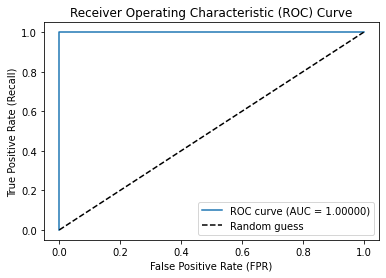

AUC-score on train data =  1.0


In [87]:
y_train_pred_proba = best_XGB_US.predict_proba(X_train_US)[:, 1]
AUC_score = show_ROC(y_train_US, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [88]:
y_test_pred = best_XGB_US.predict(X_test)

In [89]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9615182051192023
Precision =  0.03823529411764706
Recall = 0.8783783783783784
F1-score = 0.07328072153325817


In [90]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.04      0.88      0.07       148

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443



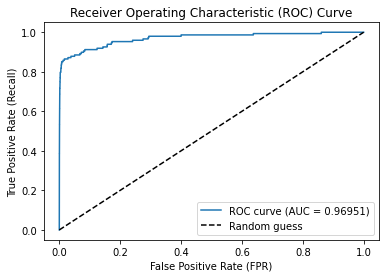

AUC-score on test data =  0.9695130413841944


In [91]:
y_test_pred_proba = best_XGB_US.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

### Random Forest

In [92]:
param_dist = {
    'n_estimators': randint(100, 250),
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': randint(15, 30),
    'min_samples_leaf': randint(15, 30),
    'max_features': ['sqrt', 'log2']
}

rf_US = RandomForestClassifier(bootstrap=True, n_jobs=-1)
rf_cv = RandomizedSearchCV(
  estimator=rf_US, param_distributions=param_dist, 
  n_iter=10, scoring='roc_auc', cv=3, n_jobs=-1, 
  verbose=3, return_train_score=True)
rf_cv.fit(X_train_US, y_train_US)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=18, min_samples_split=27, n_estimators=154;, score=(train=0.994, test=0.979) total time=   0.5s
[CV 2/3] END max_depth=50, max_features=log2, min_samples_leaf=18, min_samples_split=17, n_estimators=147;, score=(train=0.993, test=0.980) total time=   0.5s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=18, min_samples_split=27, n_estimators=154;, score=(train=0.994, test=0.971) total time=   0.6s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=26, min_samples_split=28, n_estimators=139;, score=(train=0.991, test=0.978) total time=   0.5s
[CV 1/3] END max_depth=50, max_features=log2, min_samples_leaf=18, min_samples_split=17, n_estimators=147;, score=(train=0.994, test=0.971) total time=   0.5s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=18, min_samples_split=27, n_estimators=154;, score=(train=0.992, test=0.9

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 30, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17fc487c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17fb89cc0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17fc67ca0>},
                   return_train_score=True, scoring='roc_auc', verbose=3)

In [93]:
best_params = rf_cv.best_params_
best_rf_score = rf_cv.best_score_

print(f"The highest test ROC_AUC is {best_rf_score:.8f} at params being {best_params}")

The highest test ROC_AUC is 0.97783880 at params being {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 25, 'n_estimators': 223}


#### Optimal random forest

In [94]:
best_RF_US = RandomForestClassifier(bootstrap=True, class_weight='balanced', n_jobs=-1, **best_params)
best_RF_US.fit(X_train_US, y_train_US)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=20, min_samples_split=25,
                       n_estimators=223, n_jobs=-1)

In [95]:
y_train_pred = best_RF_US.predict(X_train_US)

In [96]:
confusion = confusion_matrix(y_train_US, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_US, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_US, y_train_pred))

Accuracy =  0.9520348837209303
Precision =  0.9968051118210862
Recall = 0.9069767441860465
F1-score = 0.9497716894977168


In [97]:
print(classification_report(y_train_US, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       344
           1       1.00      0.91      0.95       344

    accuracy                           0.95       688
   macro avg       0.96      0.95      0.95       688
weighted avg       0.96      0.95      0.95       688



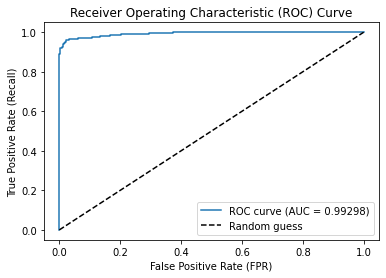

AUC-score on train data =  0.9929776230394809


In [98]:
y_train_pred_proba = best_RF_US.predict_proba(X_train_US)[:, 1]
AUC_score = show_ROC(y_train_US, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [99]:
y_test_pred = best_RF_US.predict(X_test)

In [100]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9782545088538558
Precision =  0.06422018348623854
Recall = 0.8513513513513513
F1-score = 0.11943127962085308


In [101]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.85      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



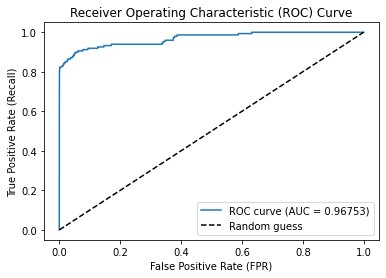

AUC-score on test data =  0.9675327519911024


In [102]:
y_test_pred_proba = best_RF_US.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

## Oversampling

In [103]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()

In [104]:
X_train_OS, y_train_OS = ROS.fit_resample(X_train, y_train)

In [105]:
X_train_OS.shape

(398040, 29)

### Logistic regression

In [106]:
C_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

lr_cv = GridSearchCV(estimator=LR, param_grid=C_grid, scoring='roc_auc', cv=5, verbose=3, return_train_score=True)
lr_cv.fit(X_train_OS, y_train_OS)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......C=0.001;, score=(train=0.990, test=0.990) total time=   0.9s
[CV 2/5] END .......C=0.001;, score=(train=0.990, test=0.989) total time=   0.7s
[CV 3/5] END .......C=0.001;, score=(train=0.990, test=0.990) total time=   0.7s
[CV 4/5] END .......C=0.001;, score=(train=0.990, test=0.990) total time=   0.9s
[CV 5/5] END .......C=0.001;, score=(train=0.990, test=0.990) total time=   0.7s
[CV 1/5] END ........C=0.01;, score=(train=0.990, test=0.990) total time=   1.0s
[CV 2/5] END ........C=0.01;, score=(train=0.990, test=0.990) total time=   1.7s
[CV 3/5] END ........C=0.01;, score=(train=0.990, test=0.990) total time=   1.1s
[CV 4/5] END ........C=0.01;, score=(train=0.990, test=0.991) total time=   1.2s
[CV 5/5] END ........C=0.01;, score=(train=0.990, test=0.990) total time=   1.1s
[CV 1/5] END .........C=0.1;, score=(train=0.990, test=0.991) total time=   1.7s
[CV 2/5] END .........C=0.1;, score=(train=0.991,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [107]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.732274,0.085294,0.042218,0.004403,0.001,{'C': 0.001},0.989839,0.989279,0.989666,0.990189,...,0.989780,0.000302,7,0.989779,0.989918,0.989777,0.989725,0.989768,0.989794,0.000065
1,1.165940,0.222841,0.045617,0.004987,0.010,{'C': 0.01},0.990399,0.989850,0.990202,0.990681,...,0.990320,0.000281,6,0.990299,0.990473,0.990302,0.990266,0.990311,0.990330,0.000073
2,1.228255,0.232868,0.048247,0.004314,0.100,{'C': 0.1},0.990530,0.989985,0.990316,0.990805,...,0.990446,0.000278,5,0.990434,0.990596,0.990428,0.990400,0.990433,0.990458,0.000070
3,1.258882,0.360504,0.054145,0.015948,1.000,{'C': 1},0.990544,0.989996,0.990340,0.990825,...,0.990463,0.000280,4,0.990445,0.990606,0.990444,0.990421,0.990447,0.990473,0.000067
4,0.989678,0.111507,0.044343,0.002868,10.000,{'C': 10.0},0.990537,0.990002,0.990342,0.990828,...,0.990464,0.000278,3,0.990444,0.990610,0.990445,0.990423,0.990449,0.990474,0.000069
5,0.973173,0.099653,0.046781,0.004634,100.000,{'C': 100.0},0.990537,0.990002,0.990342,0.990828,...,0.990464,0.000278,2,0.990444,0.990610,0.990445,0.990423,0.990449,0.990474,0.000069
6,1.024777,0.092492,0.042567,0.003448,1000.000,{'C': 1000.0},0.990537,0.990002,0.990342,0.990828,...,0.990464,0.000278,1,0.990444,0.990610,0.990445,0.990423,0.990449,0.990474,0.000069


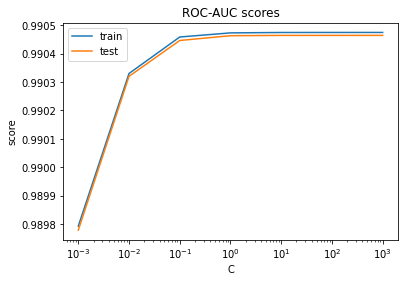

In [108]:
plt.figure()
plt.xscale('log')

sns.lineplot(data=lr_cv_df, x='param_C', y='mean_train_score', label='train')
sns.lineplot(data=lr_cv_df, x='param_C', y='mean_test_score', label='test')

plt.xlabel('C')
plt.ylabel('score')
plt.title('ROC-AUC scores')
plt.legend()
plt.show()

In [109]:
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print(f"The highest test ROC_AUC is {best_score:.8f} at C = {best_C}")

The highest test ROC_AUC is 0.99046389 at C = 1000.0


#### Optimal logistic regression

In [110]:
best_LR_OS = LogisticRegression(C=best_C)
best_LR_OS.fit(X_train_OS, y_train_OS)

LogisticRegression(C=1000.0)

In [111]:
y_train_pred = best_LR_OS.predict(X_train_OS)

In [112]:
confusion = confusion_matrix(y_train_OS, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_OS, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_OS, y_train_pred))

Accuracy =  0.9555622550497438
Precision =  0.9762369996848408
Recall = 0.9338558938800121
F1-score = 0.9545762711864407


In [113]:
print(classification_report(y_train_OS, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.93      0.95    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



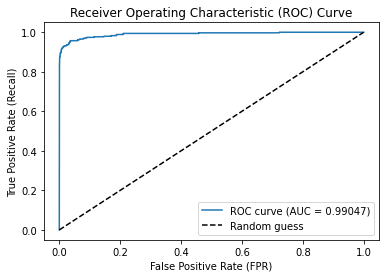

AUC-score on train data =  0.9904688660801105


In [114]:
y_train_pred_proba = best_LR_OS.predict_proba(X_train_OS)[:, 1]
AUC_score = show_ROC(y_train_OS, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [115]:
y_test_pred = best_LR_OS.predict(X_test)

In [116]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9765574710625797
Precision =  0.061465721040189124
Recall = 0.8783783783783784
F1-score = 0.11489173663278833


In [117]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



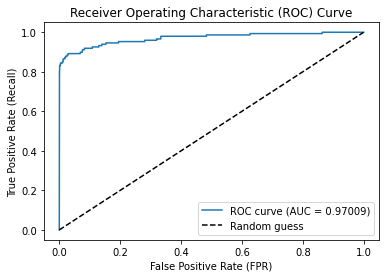

AUC-score on test data =  0.9700889837020326


In [118]:
y_test_pred_proba = best_LR_OS.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

### XGBoost

In [119]:
param_grid = {'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.6, 0.7, 0.8, 0.9]}

xgb_cv = GridSearchCV(estimator=xgb_US, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, return_train_score=True)
xgb_cv.fit(X_train_OS, y_train_OS)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=1.000) total time=   2.2s
[CV 2/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 3/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=1.000) total time=   2.0s
[CV 1/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=1.000) total time=   2.0s
[CV 2/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 3/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=1.000) total time=   2.0s
[CV 1/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=1.000) total time=   1.8s
[CV 2/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 3/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=1.000) total time=   1.8s
[CV 1/3] END learning_rate=0.2, subsample=0.9;, 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [120]:
xgb_cv_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_df.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.919281,0.097022,0.119088,0.011391,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999953,0.999904,0.999949,0.999935,0.000022,18,0.999952,0.999963,0.999964,0.999960,5.586325e-06
1,1.840850,0.043954,0.110504,0.002638,0.2,0.7,"{'learning_rate': 0.2, 'subsample': 0.7}",0.999938,0.999908,0.999951,0.999932,0.000018,19,0.999937,0.999963,0.999961,0.999954,1.180875e-05
11,1.898824,0.262561,0.112502,0.002426,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.999994,0.999951,0.999975,0.999973,0.000018,11,0.999998,1.000000,1.000000,0.999999,8.297595e-07
13,2.121740,0.202979,0.125807,0.012559,0.5,0.7,"{'learning_rate': 0.5, 'subsample': 0.7}",0.999996,0.999967,0.999976,0.999980,0.000012,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,1.846450,0.057209,0.113463,0.005239,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.999994,0.999959,0.999976,0.999976,0.000015,9,0.999997,1.000000,0.999998,0.999998,1.222617e-06


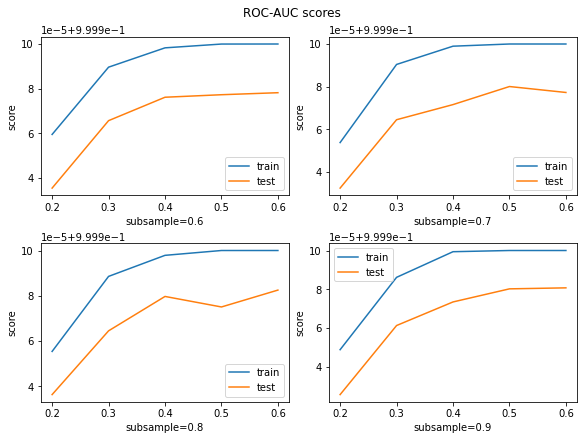

In [121]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

for n in range(4):
  subsample = param_grid['subsample'][n]
  temp_df = xgb_cv_df[xgb_cv_df.param_subsample == subsample]
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_train_score', label='train', ax=axs[int(n/2)][n%2])
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_test_score', label='test', ax=axs[int(n/2)][n%2])
  axs[int(n/2)][n%2].set_xlabel("learning rate")
  axs[int(n/2)][n%2].set_ylabel("score")
  axs[int(n/2)][n%2].set_xlabel(f"subsample={subsample}")
  axs[int(n/2)][n%2].legend()

fig.suptitle("ROC-AUC scores")
plt.show()

In [122]:
best_lr, best_ss = xgb_cv.best_params_.values()
best_xgb_score = xgb_cv.best_score_

print(f"The highest test ROC_AUC is {best_xgb_score:.8f} at subsample = {best_ss} and learning rate = {best_lr}")

The highest test ROC_AUC is 0.99998249 at subsample = 0.8 and learning rate = 0.6


#### Optimal XGBoost

In [123]:
best_XGB_OS = XGBClassifier(
  max_depth=2, n_estimators=250,
  subsample=best_ss, learning_rate=best_lr,
  objective='binary:logistic')
best_XGB_OS.fit(X_train_OS, y_train_OS)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [124]:
y_train_pred = best_XGB_OS.predict(X_train_OS)

In [125]:
confusion = confusion_matrix(y_train_OS, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_OS, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_OS, y_train_pred))

Accuracy =  0.9999799015174354
Precision =  0.999959804650602
Recall = 1.0
F1-score = 0.9999799019213763


In [126]:
print(classification_report(y_train_OS, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



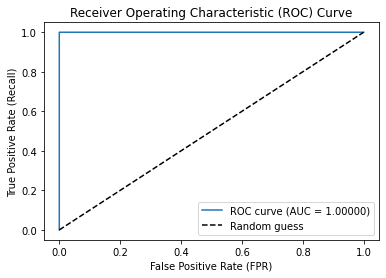

AUC-score on train data =  1.0


In [127]:
y_train_pred_proba = best_XGB_OS.predict_proba(X_train_OS)[:, 1]
AUC_score = show_ROC(y_train_OS, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [128]:
y_test_pred = best_XGB_OS.predict(X_test)

In [129]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9993914071369217
Precision =  0.8333333333333334
Recall = 0.8108108108108109
F1-score = 0.821917808219178


In [130]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.81      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



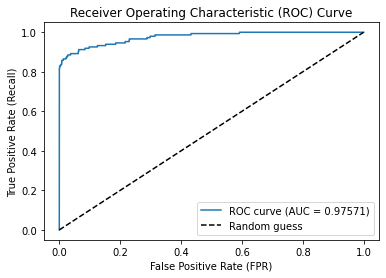

AUC-score on test data =  0.9757055402315968


In [131]:
y_test_pred_proba = best_XGB_OS.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

## SMOTE

In [132]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [133]:
X_train_SM, y_train_SM = smote.fit_resample(X_train, y_train)

In [134]:
X_train_SM.shape

(398040, 29)

### Logistic regression

In [135]:
C_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

lr_cv = GridSearchCV(estimator=LR, param_grid=C_grid, scoring='roc_auc', cv=5, verbose=3, return_train_score=True)
lr_cv.fit(X_train_SM, y_train_SM)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .......C=0.001;, score=(train=0.992, test=0.992) total time=   0.7s
[CV 2/5] END .......C=0.001;, score=(train=0.992, test=0.991) total time=   0.7s
[CV 3/5] END .......C=0.001;, score=(train=0.992, test=0.991) total time=   0.7s
[CV 4/5] END .......C=0.001;, score=(train=0.992, test=0.992) total time=   0.7s
[CV 5/5] END .......C=0.001;, score=(train=0.992, test=0.992) total time=   0.7s
[CV 1/5] END ........C=0.01;, score=(train=0.992, test=0.992) total time=   0.9s
[CV 2/5] END ........C=0.01;, score=(train=0.992, test=0.992) total time=   1.1s
[CV 3/5] END ........C=0.01;, score=(train=0.992, test=0.992) total time=   1.1s
[CV 4/5] END ........C=0.01;, score=(train=0.992, test=0.992) total time=   0.9s
[CV 5/5] END ........C=0.01;, score=(train=0.992, test=0.993) total time=   1.1s
[CV 1/5] END .........C=0.1;, score=(train=0.992, test=0.992) total time=   1.1s
[CV 2/5] END .........C=0.1;, score=(train=0.992,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [136]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.650274,0.025499,0.042761,0.002023,0.001,{'C': 0.001},0.991823,0.991444,0.991250,0.991620,...,0.991645,0.000292,7,0.991626,0.991715,0.991718,0.991669,0.991547,0.991655,0.000064
1,0.982898,0.093254,0.045143,0.005320,0.010,{'C': 0.01},0.992303,0.991959,0.991730,0.992079,...,0.992128,0.000288,6,0.992099,0.992208,0.992192,0.992157,0.992034,0.992138,0.000064
2,1.000019,0.084072,0.045420,0.005366,0.100,{'C': 0.1},0.992426,0.992094,0.991848,0.992201,...,0.992250,0.000286,5,0.992225,0.992325,0.992311,0.992279,0.992157,0.992259,0.000062
3,0.992783,0.103982,0.047477,0.002584,1.000,{'C': 1},0.992436,0.992108,0.991862,0.992211,...,0.992263,0.000284,4,0.992235,0.992336,0.992325,0.992289,0.992170,0.992271,0.000062
4,1.099738,0.166574,0.053805,0.014262,10.000,{'C': 10.0},0.992437,0.992110,0.991863,0.992216,...,0.992264,0.000284,3,0.992236,0.992338,0.992327,0.992294,0.992172,0.992273,0.000062
5,1.053686,0.055368,0.045437,0.001558,100.000,{'C': 100.0},0.992437,0.992110,0.991863,0.992216,...,0.992265,0.000284,2,0.992237,0.992338,0.992327,0.992294,0.992172,0.992274,0.000062
6,1.016472,0.074865,0.043160,0.001209,1000.000,{'C': 1000.0},0.992437,0.992110,0.991863,0.992216,...,0.992265,0.000284,1,0.992237,0.992338,0.992327,0.992294,0.992172,0.992274,0.000062


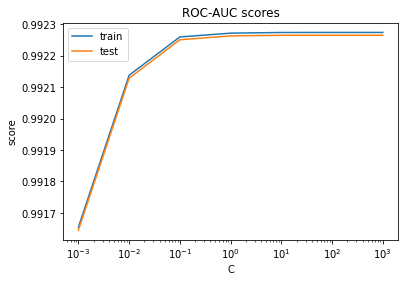

In [137]:
plt.figure()
plt.xscale('log')

sns.lineplot(data=lr_cv_df, x='param_C', y='mean_train_score', label='train')
sns.lineplot(data=lr_cv_df, x='param_C', y='mean_test_score', label='test')

plt.xlabel('C')
plt.ylabel('score')
plt.title('ROC-AUC scores')
plt.legend()
plt.show()

In [138]:
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print(f"The highest test ROC_AUC is {best_score:.8f} at C = {best_C}")

The highest test ROC_AUC is 0.99226464 at C = 1000.0


#### Optimal logistic regression

In [139]:
best_LR_SM = LogisticRegression(C=best_C)
best_LR_SM.fit(X_train_SM, y_train_SM)

LogisticRegression(C=1000.0)

In [140]:
y_train_pred = best_LR_SM.predict(X_train_SM)

In [141]:
confusion = confusion_matrix(y_train_SM, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_SM, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_SM, y_train_pred))

Accuracy =  0.9578585066827454
Precision =  0.9749205191014749
Recall = 0.9398954878906642
F1-score = 0.9570876717235027


In [142]:
print(classification_report(y_train_SM, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.97      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040



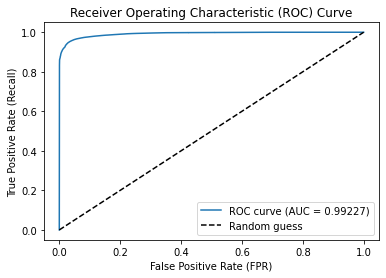

AUC-score on train data =  0.992269326803639


In [143]:
y_train_pred_proba = best_LR_SM.predict_proba(X_train_SM)[:, 1]
AUC_score = show_ROC(y_train_SM, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [144]:
y_test_pred = best_LR_SM.predict(X_test)

In [145]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9750242851959786
Precision =  0.0578806767586821
Recall = 0.8783783783783784
F1-score = 0.1086048454469507


In [146]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



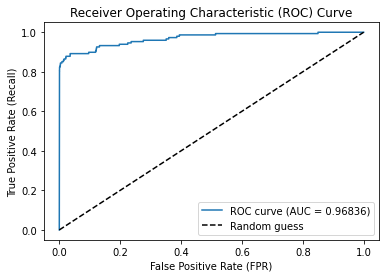

AUC-score on test data =  0.9683591367321362


In [147]:
y_test_pred_proba = best_LR_SM.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

### XGBoost

In [148]:
param_grid = {'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.6, 0.7, 0.8, 0.9]}

xgb_cv = GridSearchCV(estimator=xgb_US, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, return_train_score=True)
xgb_cv.fit(X_train_SM, y_train_SM)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=1.000) total time=   2.2s
[CV 2/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=1.000) total time=   2.0s
[CV 3/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 1/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=1.000) total time=   2.1s
[CV 2/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=1.000) total time=   2.1s
[CV 3/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=1.000) total time=   1.9s
[CV 1/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=1.000) total time=   1.8s
[CV 2/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=1.000) total time=   2.0s
[CV 3/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=1.000) total time=   1.8s
[CV 1/3] END learning_rate=0.2, subsample=0.9;, 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [149]:
xgb_cv_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_df.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
11,1.876219,0.127634,0.112555,0.002223,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.999967,0.999926,0.999952,0.999948,0.000017,12,0.999977,0.999980,0.999980,0.999979,0.000001
4,1.901650,0.137889,0.112111,0.003556,0.3,0.6,"{'learning_rate': 0.3, 'subsample': 0.6}",0.999937,0.999897,0.999913,0.999916,0.000016,14,0.999943,0.999954,0.999941,0.999946,0.000006
3,1.847177,0.121824,0.115070,0.003112,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999852,0.999797,0.999831,0.999827,0.000022,19,0.999858,0.999855,0.999857,0.999857,0.000001
14,1.863031,0.064457,0.113455,0.001464,0.5,0.8,"{'learning_rate': 0.5, 'subsample': 0.8}",0.999977,0.999955,0.999965,0.999966,0.000009,4,0.999988,0.999990,0.999982,0.999987,0.000003
7,1.803034,0.126494,0.112195,0.002758,0.3,0.9,"{'learning_rate': 0.3, 'subsample': 0.9}",0.999913,0.999898,0.999925,0.999912,0.000011,16,0.999932,0.999948,0.999947,0.999942,0.000007


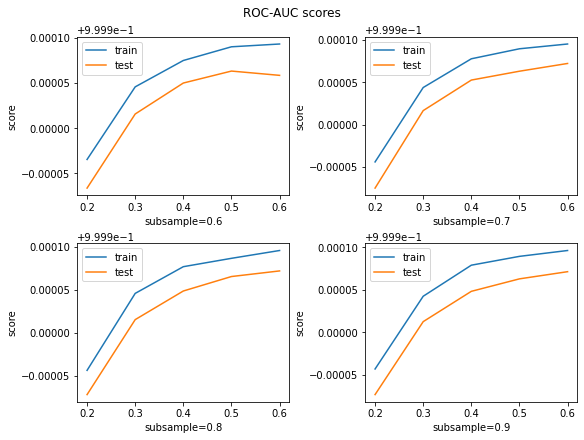

In [150]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

for n in range(4):
  subsample = param_grid['subsample'][n]
  temp_df = xgb_cv_df[xgb_cv_df.param_subsample == subsample]
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_train_score', label='train', ax=axs[int(n/2)][n%2])
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_test_score', label='test', ax=axs[int(n/2)][n%2])
  axs[int(n/2)][n%2].set_xlabel("learning rate")
  axs[int(n/2)][n%2].set_ylabel("score")
  axs[int(n/2)][n%2].set_xlabel(f"subsample={subsample}")
  axs[int(n/2)][n%2].legend()

fig.suptitle("ROC-AUC scores")
plt.show()

In [151]:
best_lr, best_ss = xgb_cv.best_params_.values()
best_xgb_score = xgb_cv.best_score_

print(f"The highest test ROC_AUC is {best_xgb_score:.8f} at subsample = {best_ss} and learning rate = {best_lr}")

The highest test ROC_AUC is 0.99997221 at subsample = 0.8 and learning rate = 0.6


#### Optimal XGBoost

In [152]:
best_XGB_SM = XGBClassifier(
  max_depth=2, n_estimators=250,
  subsample=best_ss, learning_rate=best_lr,
  objective='binary:logistic')
best_XGB_SM.fit(X_train_SM, y_train_SM)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [153]:
y_train_pred = best_XGB_SM.predict(X_train_SM)

In [154]:
confusion = confusion_matrix(y_train_SM, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_SM, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_SM, y_train_pred))

Accuracy =  0.9995452718319767
Precision =  0.9991114145577404
Recall = 0.9999799015174354
F1-score = 0.9995454693844752


In [155]:
print(classification_report(y_train_SM, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



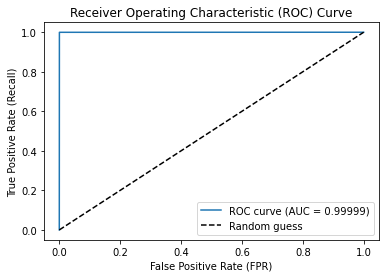

AUC-score on train data =  0.9999940984187002


In [156]:
y_train_pred_proba = best_XGB_SM.predict_proba(X_train_SM)[:, 1]
AUC_score = show_ROC(y_train_SM, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [157]:
y_test_pred = best_XGB_SM.predict(X_test)

In [158]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9980571843217115
Precision =  0.46484375
Recall = 0.8040540540540541
F1-score = 0.5891089108910891


In [159]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.46      0.80      0.59       148

    accuracy                           1.00     85443
   macro avg       0.73      0.90      0.79     85443
weighted avg       1.00      1.00      1.00     85443



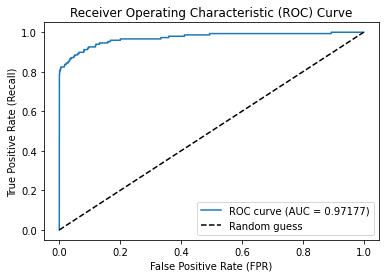

AUC-score on test data =  0.971772687160459


In [160]:
y_test_pred_proba = best_XGB_SM.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

## AdaSyn

In [161]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)

In [162]:
X_train_AS, y_train_AS = adasyn.fit_resample(X_train, y_train)

In [163]:
X_train_AS.shape

(398055, 29)

### Logistic Regression

In [164]:
C_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}

lr_cv = GridSearchCV(estimator=LR, param_grid=C_grid, scoring='roc_auc', cv=5, verbose=3, n_jobs=-1, return_train_score=True)
lr_cv.fit(X_train_AS, y_train_AS)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 3/5] END ........C=0.01;, score=(train=0.969, test=0.979) total time=   2.1s
[CV 2/5] END ........C=0.01;, score=(train=0.978, test=0.932) total time=   2.5s
[CV 1/5] END .......C=0.001;, score=(train=0.969, test=0.953) total time=   3.3s
[CV 5/5] END .......C=0.001;, score=(train=0.971, test=0.954) total time=   3.3s
[CV 3/5] END .......C=0.001;, score=(train=0.967, test=0.977) total time=   3.5s
[CV 4/5] END .......C=0.001;, score=(train=0.970, test=0.965) total time=   3.6s
[CV 2/5] END .......C=0.001;, score=(train=0.977, test=0.929) total time=   3.6s
[CV 1/5] END ........C=0.01;, score=(train=0.970, test=0.958) total time=   3.6s
[CV 4/5] END ........C=0.01;, score=(train=0.972, test=0.963) total time=   2.0s
[CV 5/5] END ........C=0.01;, score=(train=0.973, test=0.958) total time=   2.3s
[CV 1/5] END .........C=0.1;, score=(train=0.971, test=0.959) total time=   2.6s
[CV 3/5] END .........C=0.1;, score=(train=0.969,

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [165]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.289799,0.153490,0.173126,0.046947,0.001,{'C': 0.001},0.953150,0.928640,0.976794,0.965121,...,0.955586,0.015966,7,0.969028,0.976654,0.967215,0.970261,0.971125,0.970857,0.003182
1,2.349159,0.581574,0.164732,0.050441,0.010,{'C': 0.01},0.958030,0.932263,0.978949,0.963255,...,0.958069,0.015026,6,0.970450,0.978458,0.968940,0.971985,0.972684,0.972504,0.003245
2,2.745856,0.247889,0.165497,0.033834,0.100,{'C': 0.1},0.959235,0.932811,0.979322,0.962670,...,0.958483,0.014909,5,0.970615,0.978722,0.969175,0.972214,0.972894,0.972724,0.003265
3,2.349528,0.385140,0.145950,0.028199,1.000,{'C': 1},0.959360,0.932815,0.979362,0.962516,...,0.958490,0.014912,4,0.970625,0.978739,0.969194,0.972233,0.972910,0.972740,0.003266
4,2.222829,0.213333,0.131479,0.032863,10.000,{'C': 10.0},0.959375,0.932808,0.979366,0.962615,...,0.958513,0.014921,3,0.970626,0.978743,0.969196,0.972229,0.972911,0.972741,0.003267
5,2.467623,0.186984,0.120588,0.011514,100.000,{'C': 100.0},0.959377,0.932808,0.979367,0.962618,...,0.958514,0.014921,2,0.970626,0.978744,0.969196,0.972230,0.972912,0.972741,0.003267
6,1.866881,0.483315,0.073560,0.031605,1000.000,{'C': 1000.0},0.959377,0.932808,0.979367,0.962618,...,0.958514,0.014921,1,0.970626,0.978744,0.969196,0.972230,0.972912,0.972741,0.003267


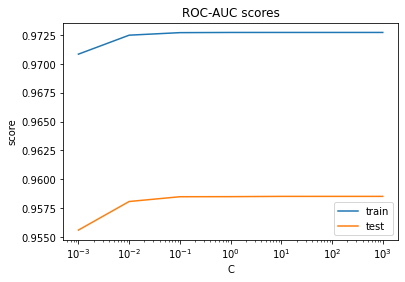

In [166]:
plt.figure()
plt.xscale('log')

sns.lineplot(data=lr_cv_df, x='param_C', y='mean_train_score', label='train')
sns.lineplot(data=lr_cv_df, x='param_C', y='mean_test_score', label='test')

plt.xlabel('C')
plt.ylabel('score')
plt.title('ROC-AUC scores')
plt.legend()
plt.show()

In [167]:
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print(f"The highest test ROC_AUC is {best_score:.8f} at C = {best_C}")

The highest test ROC_AUC is 0.95851422 at C = 1000.0


#### Optimal logistic regression

In [168]:
best_LR_AS = LogisticRegression(C=best_C)
best_LR_AS.fit(X_train_AS, y_train_AS)

LogisticRegression(C=1000.0)

In [169]:
y_train_pred = best_LR_AS.predict(X_train_AS)

In [170]:
confusion = confusion_matrix(y_train_AS, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_AS, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_AS, y_train_pred))

Accuracy =  0.9082689578073382
Precision =  0.9195281241126513
Recall = 0.8948576883462708
F1-score = 0.9070251826954906


In [171]:
print(classification_report(y_train_AS, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91    199020
           1       0.92      0.89      0.91    199035

    accuracy                           0.91    398055
   macro avg       0.91      0.91      0.91    398055
weighted avg       0.91      0.91      0.91    398055



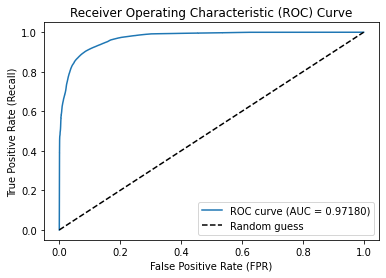

AUC-score on train data =  0.971798006819443


In [172]:
y_train_pred_proba = best_LR_AS.predict_proba(X_train_AS)[:, 1]
AUC_score = show_ROC(y_train_AS, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [173]:
y_test_pred = best_LR_AS.predict(X_test)

In [174]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.9205084091148485
Precision =  0.019247467438494936
Recall = 0.8986486486486487
F1-score = 0.0376877302351941


In [175]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.90      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443



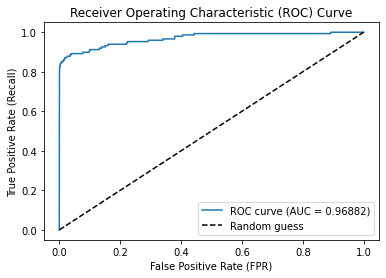

AUC-score on test data =  0.96881589808344


In [176]:
y_test_pred_proba = best_LR_AS.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

### XGBoost

In [177]:
param_grid = {'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.6, 0.7, 0.8, 0.9]}

xgb_cv = GridSearchCV(estimator=xgb_US, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, n_jobs=-1, return_train_score=True)
xgb_cv.fit(X_train_AS, y_train_AS)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.994) total time=  12.6s
[CV 3/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.984) total time=  12.7s
[CV 2/3] END learning_rate=0.2, subsample=0.8;, score=(train=1.000, test=0.981) total time=  12.7s
[CV 2/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.975) total time=  12.9s
[CV 1/3] END learning_rate=0.2, subsample=0.7;, score=(train=1.000, test=0.994) total time=  13.1s
[CV 1/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.995) total time=  13.2s
[CV 2/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.977) total time=  13.2s
[CV 3/3] END learning_rate=0.2, subsample=0.6;, score=(train=1.000, test=0.986) total time=  13.3s
[CV 2/3] END learning_rate=0.2, subsample=0.9;, score=(train=1.000, test=0.982) total time=  12.1s
[CV 3/3] END learning_rate=0.2, subsample=0.8;, 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [178]:
xgb_cv_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_cv_df.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
12,13.967195,0.168720,0.686356,0.018114,0.5,0.6,"{'learning_rate': 0.5, 'subsample': 0.6}",0.995207,0.980690,0.984550,0.986816,0.006140,10,0.999965,0.999970,0.999972,0.999969,0.000003
8,13.861638,0.056993,0.624498,0.009188,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.992957,0.982741,0.986188,0.987295,0.004243,8,0.999932,0.999947,0.999962,0.999947,0.000012
11,13.276961,0.089773,0.659592,0.008937,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.993552,0.981631,0.986440,0.987208,0.004897,9,0.999916,0.999943,0.999957,0.999939,0.000017
6,11.793257,0.057180,0.552976,0.018374,0.3,0.8,"{'learning_rate': 0.3, 'subsample': 0.8}",0.993793,0.979305,0.986540,0.986546,0.005915,13,0.999837,0.999867,0.999869,0.999858,0.000014
9,13.642631,0.164384,0.599369,0.018118,0.4,0.7,"{'learning_rate': 0.4, 'subsample': 0.7}",0.995250,0.981378,0.987207,0.987945,0.005687,5,0.999924,0.999956,0.999952,0.999944,0.000014


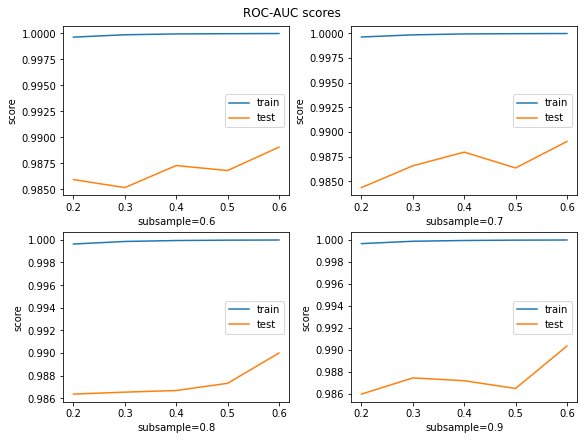

In [179]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True)

for n in range(4):
  subsample = param_grid['subsample'][n]
  temp_df = xgb_cv_df[xgb_cv_df.param_subsample == subsample]
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_train_score', label='train', ax=axs[int(n/2)][n%2])
  sns.lineplot(data=temp_df, x='param_learning_rate', y='mean_test_score', label='test', ax=axs[int(n/2)][n%2])
  axs[int(n/2)][n%2].set_xlabel("learning rate")
  axs[int(n/2)][n%2].set_ylabel("score")
  axs[int(n/2)][n%2].set_xlabel(f"subsample={subsample}")
  axs[int(n/2)][n%2].legend()

fig.suptitle("ROC-AUC scores")
plt.show()

In [180]:
best_lr, best_ss = xgb_cv.best_params_.values()
best_xgb_score = xgb_cv.best_score_

print(f"The highest test ROC_AUC is {best_xgb_score:.8f} at subsample = {best_ss} and learning rate = {best_lr}")

The highest test ROC_AUC is 0.99035702 at subsample = 0.9 and learning rate = 0.6


#### Optimal XGBoost

In [181]:
best_XGB_AS = XGBClassifier(
  max_depth=2, n_estimators=250,
  subsample=best_ss, learning_rate=best_lr,
  objective='binary:logistic')
best_XGB_AS.fit(X_train_AS, y_train_AS)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.6, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [182]:
y_train_pred = best_XGB_AS.predict(X_train_AS)

In [183]:
confusion = confusion_matrix(y_train_AS, y_train_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_train_AS, y_train_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_train_AS, y_train_pred))

Accuracy =  0.9992061398550451
Precision =  0.9984348585102061
Recall = 0.99997990303213
F1-score = 0.9992067835071213


In [184]:
print(classification_report(y_train_AS, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199035

    accuracy                           1.00    398055
   macro avg       1.00      1.00      1.00    398055
weighted avg       1.00      1.00      1.00    398055



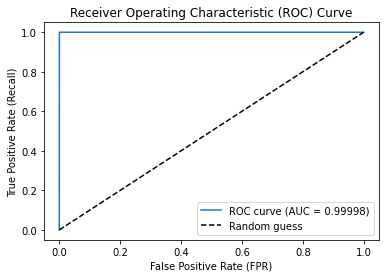

AUC-score on train data =  0.9999755202002107


In [185]:
y_train_pred_proba = best_XGB_AS.predict_proba(X_train_AS)[:, 1]
AUC_score = show_ROC(y_train_AS, y_train_pred_proba)
print("AUC-score on train data = ", AUC_score)

In [186]:
y_test_pred = best_XGB_AS.predict(X_test)

In [187]:
confusion = confusion_matrix(y_test, y_test_pred)

TP = confusion[1,1]
FP = confusion[0,1]
TN = confusion[0,0]
FN = confusion[1,0]

print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred))
print("Precision = ", TP / (TP + FP))
print("Recall =", TP / (TP + FN))
print("F1-score =", metrics.f1_score(y_test, y_test_pred))

Accuracy =  0.99750711000316
Precision =  0.39344262295081966
Recall = 0.8108108108108109
F1-score = 0.5298013245033113


In [188]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.39      0.81      0.53       148

    accuracy                           1.00     85443
   macro avg       0.70      0.90      0.76     85443
weighted avg       1.00      1.00      1.00     85443



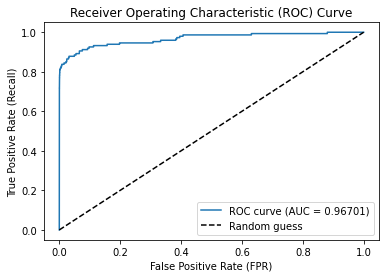

AUC-score on test data =  0.9670076665562919


In [189]:
y_test_pred_proba = best_XGB_AS.predict_proba(X_test)[:, 1]
AUC_score = show_ROC(y_test, y_test_pred_proba)
print("AUC-score on test data = ", AUC_score)

## Comparing the models

In [190]:
# We collect the AUC scores for each model (logistic and XGBoost) trained above
base_AUC = metrics.roc_auc_score(y_train, best_LR.predict_proba(X_train)[:, 1])
us_AUC = metrics.roc_auc_score(y_train_US, best_LR_US.predict_proba(X_train_US)[:, 1])
os_AUC = metrics.roc_auc_score(y_train_OS, best_LR_OS.predict_proba(X_train_OS)[:, 1])
sm_AUC = metrics.roc_auc_score(y_train_SM, best_LR_SM.predict_proba(X_train_SM)[:, 1])
as_AUC = metrics.roc_auc_score(y_train_AS, best_LR_AS.predict_proba(X_train_AS)[:, 1])

LR_train_AUCs = [base_AUC, us_AUC, os_AUC, sm_AUC, as_AUC]

In [191]:
base_AUC = metrics.roc_auc_score(y_test, best_LR.predict_proba(X_test)[:, 1])
us_AUC = metrics.roc_auc_score(y_test, best_LR_US.predict_proba(X_test)[:, 1])
os_AUC = metrics.roc_auc_score(y_test, best_LR_OS.predict_proba(X_test)[:, 1])
sm_AUC = metrics.roc_auc_score(y_test, best_LR_SM.predict_proba(X_test)[:, 1])
as_AUC = metrics.roc_auc_score(y_test, best_LR_AS.predict_proba(X_test)[:, 1])

LR_test_AUCs = [base_AUC, us_AUC, os_AUC, sm_AUC, as_AUC]

In [192]:
base_AUC = metrics.roc_auc_score(y_train, best_XGB.predict_proba(X_train)[:, 1])
us_AUC = metrics.roc_auc_score(y_train_US, best_XGB_US.predict_proba(X_train_US)[:, 1])
os_AUC = metrics.roc_auc_score(y_train_OS, best_XGB_OS.predict_proba(X_train_OS)[:, 1])
sm_AUC = metrics.roc_auc_score(y_train_SM, best_XGB_SM.predict_proba(X_train_SM)[:, 1])
as_AUC = metrics.roc_auc_score(y_train_AS, best_XGB_AS.predict_proba(X_train_AS)[:, 1])

XGB_train_AUCs = [base_AUC, us_AUC, os_AUC, sm_AUC, as_AUC]

In [193]:
base_AUC = metrics.roc_auc_score(y_test, best_XGB.predict_proba(X_test)[:, 1])
us_AUC = metrics.roc_auc_score(y_test, best_XGB_US.predict_proba(X_test)[:, 1])
os_AUC = metrics.roc_auc_score(y_test, best_XGB_OS.predict_proba(X_test)[:, 1])
sm_AUC = metrics.roc_auc_score(y_test, best_XGB_SM.predict_proba(X_test)[:, 1])
as_AUC = metrics.roc_auc_score(y_test, best_XGB_AS.predict_proba(X_test)[:, 1])

XGB_test_AUCs = [base_AUC, us_AUC, os_AUC, sm_AUC, as_AUC]

In [194]:
from tabulate import tabulate

headers = ["Method", "Logistic (train)", "Logistic (test)", "XGBoost (train)", "XGBoost (test)"]
methods = ["Base", "Undersampling", "Oversampling", "SMOTE", "AdaSyn"]

rows = list(zip(methods, LR_train_AUCs, LR_test_AUCs, XGB_train_AUCs, XGB_test_AUCs))

print(tabulate(rows, headers=headers, tablefmt='grid'))

+---------------+--------------------+-------------------+-------------------+------------------+
| Method        |   Logistic (train) |   Logistic (test) |   XGBoost (train) |   XGBoost (test) |
+===============+====================+===================+===================+==================+
| Base          |           0.986828 |          0.970624 |          0.999976 |         0.972366 |
+---------------+--------------------+-------------------+-------------------+------------------+
| Undersampling |           0.987747 |          0.971753 |          1        |         0.969513 |
+---------------+--------------------+-------------------+-------------------+------------------+
| Oversampling  |           0.990469 |          0.970089 |          1        |         0.975706 |
+---------------+--------------------+-------------------+-------------------+------------------+
| SMOTE         |           0.992269 |          0.968359 |          0.999994 |         0.971773 |
+---------------+---

We see that the base models (without balancing techniques) perform than the others, but by a slight edge. Further, XGBoost performs better than logistic regression. 

For this problem, it is safe to proceed with XGBoost on imbalanced dataset, though all methods perform within small margins of each other.